In [ ]:
"""Atividade 6: Autômatos Celulares."""

import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
IMG_PATH = "6-autômatos-celulares/img"
FRAMES_PATH = f"{IMG_PATH}/frames"

In [ ]:
SAUDÁVEL = 0
INFECTADO = 1
RECUPERADO = 2

REPETIÇÕES = 10

In [ ]:
def simula_infectados(
    tamanho: int,
    passos: int,
    infectados_incial: int,
    prob_curar: float,
    prob_infectar: float,
):
    """Roda uma simulação com tamanho, passos e num_infectados."""
    vizinhos = [(0, 1), (1, 0), (-1, 0), (0, -1)]

    pessoas_original = np.zeros((tamanho, tamanho), dtype=np.int8)
    infectados = np.random.choice(tamanho * tamanho, infectados_incial, replace=False)
    pessoas_original.ravel()[infectados] = 1

    num_infectados = np.zeros((REPETIÇÕES, passos))
    num_recuperados = np.zeros((REPETIÇÕES, passos))
    num_saudáveis = np.zeros((REPETIÇÕES, passos))

    cmap = mpl.colors.ListedColormap(["blue", "red", "green"])

    files = glob.glob(f"{FRAMES_PATH}/*")
    for f in files:
        os.remove(f)

    frames = []

    for y in range(REPETIÇÕES):
        frames.clear()
        pessoas = pessoas_original.copy()
        for z in range(passos):
            novas_pessoas = pessoas.copy()
            plt.imshow(pessoas, cmap=cmap, vmin=SAUDÁVEL, vmax=RECUPERADO)
            plt.autoscale(False)
            plt.colorbar()
            plt.savefig(f"{FRAMES_PATH}/{z+1}.png")
            plt.clf()
            img = Image.open(f"{FRAMES_PATH}/{z+1}.png")
            frames.append(img)
            num_saudáveis[y][z] = np.count_nonzero(novas_pessoas == SAUDÁVEL)
            num_recuperados[y][z] = np.count_nonzero(novas_pessoas == RECUPERADO)
            num_infectados[y][z] = np.count_nonzero(novas_pessoas == INFECTADO)
            for i in range(tamanho):
                for j in range(tamanho):
                    if pessoas[i][j] == INFECTADO and np.random.rand() < prob_curar:
                        novas_pessoas[i][j] = RECUPERADO
                    if pessoas[i][j] == SAUDÁVEL:
                        for k in vizinhos:
                            if (
                                pessoas[(i + k[0]) % tamanho][(j + k[1]) % tamanho]
                                == INFECTADO
                                and np.random.rand() < prob_infectar
                            ):
                                novas_pessoas[i][j] = 1
            pessoas = novas_pessoas
    num_infectados_avg = np.mean(num_infectados, axis=0)
    num_recuperados_avg = np.mean(num_recuperados, axis=0)
    num_saudáveis_avg = np.mean(num_saudáveis, axis=0)
    # Evita plot vazio no final
    plt.close()
    plt.title(
        f"Distruibuição das Popuplações\n $p_c = {prob_infectar}$ $p_r = {prob_curar}$ $n = {tamanho}$ e {passos} passos"
    )
    plt.plot(num_saudáveis_avg, color="b", label="Saudáveis")
    plt.plot(num_infectados_avg, color="r", label="Infectados")
    plt.plot(num_recuperados_avg, color="g", label="Recuperados")
    plt.legend()
    plt.savefig(f"{IMG_PATH}/pop-c{prob_curar}-i{prob_infectar}.png")
    plt.show()
    return frames

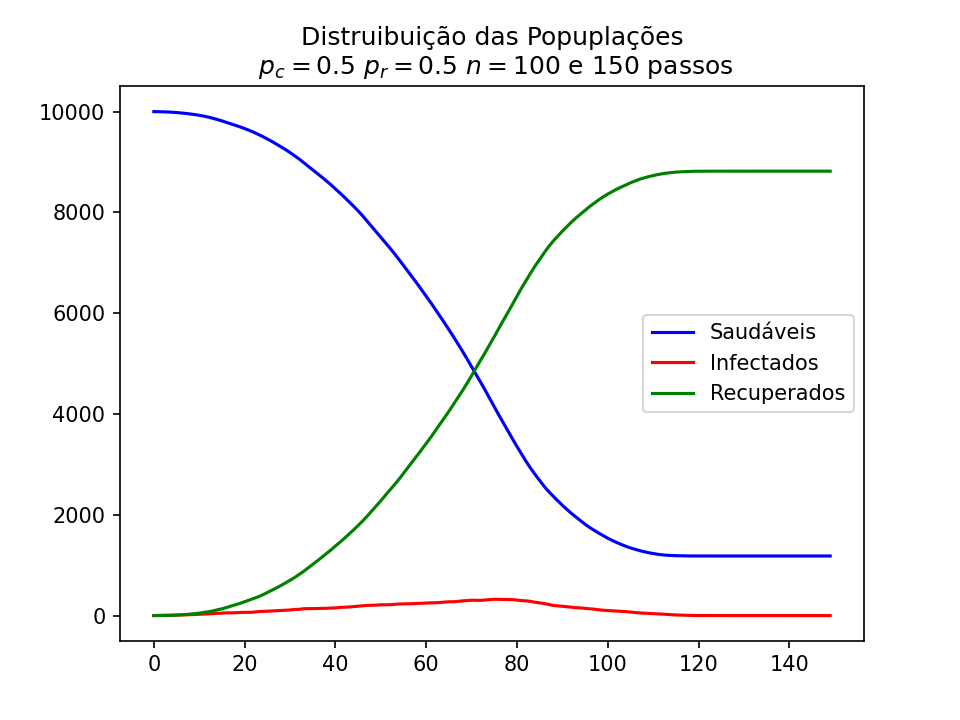

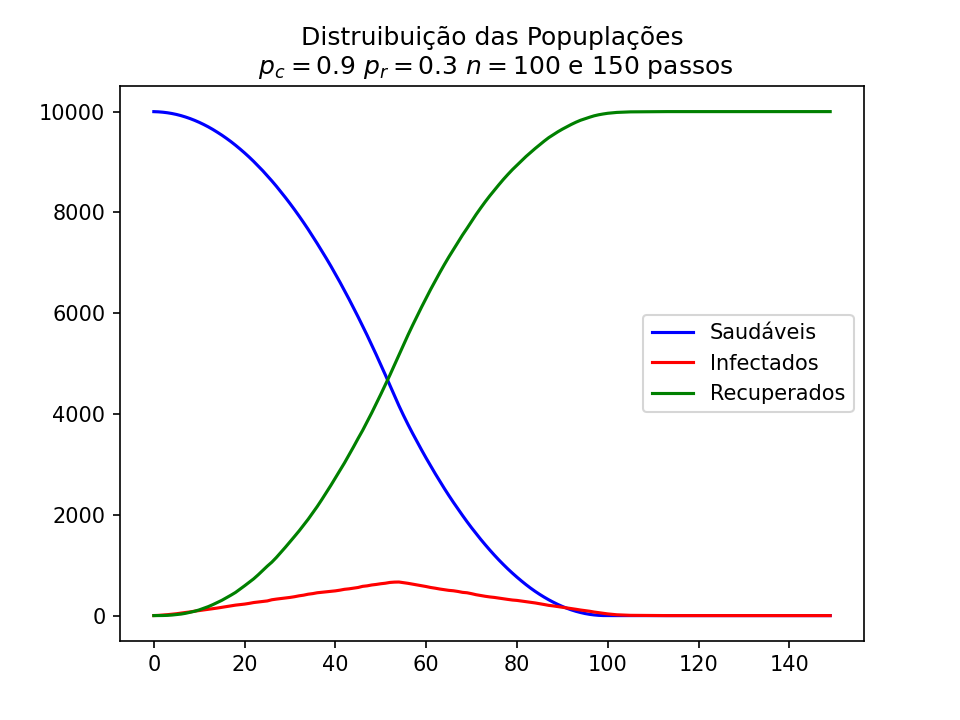

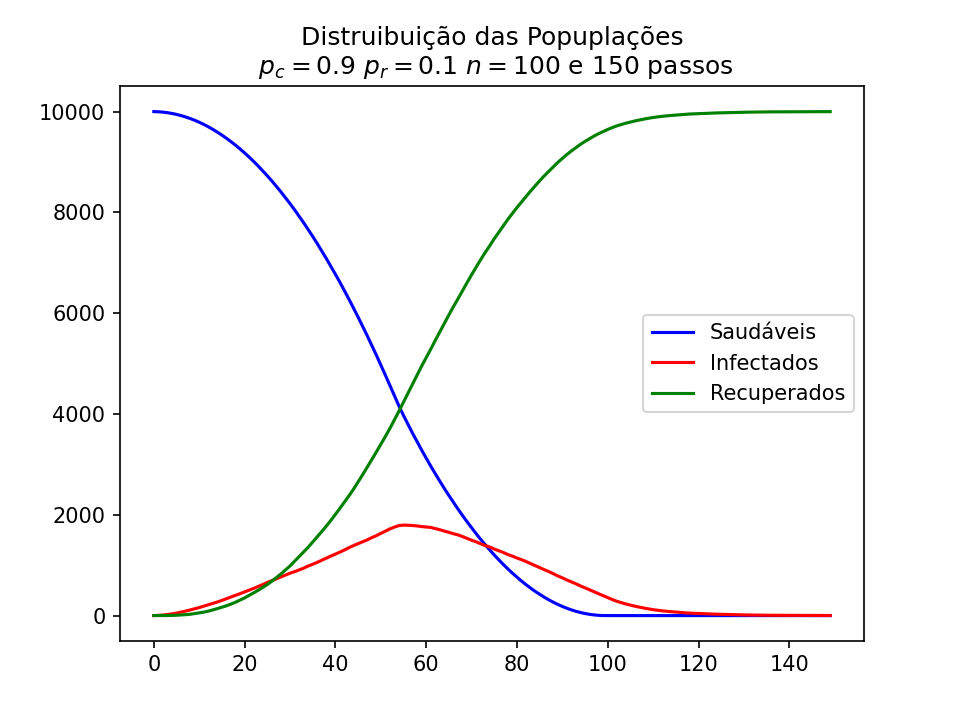

In [1]:
# (Curar, Infectar)
probabilidades = [(0.5, 0.5), (0.3, 0.9), (0.1, 0.9)]

for p in probabilidades:
    frames = simula_infectados(100, 150, 1, p[0], p[1])
    frames[0].save(
        f"{IMG_PATH}/animation-c{p[0]}-i{p[1]}.gif",
        format="GIF",
        append_images=frames[1:],
        save_all=True,
        duration=50,
        loop=0,
    )

# Análise

Condição inicial: apenas um individuo (aleatório) infectado.

Conjuntos para as probabilidades: ($p_c$,$p_r$) = `[(0.5, 0.5), (0.9, 0.3), (0.9, 0.1)]`. A escolha desses parâmetros teve como base os seguintes critério: na prática, o módulo das probabilidades define a velocidade da simulação, enquanto o comportamento como um todo depende da proporção entre contaminar e recuperar.

Os experimentos foram repetidos 10 vezes, para aumentar a confiabilidade.

- Na proporção 1:1, muitos indivíduos conseguem escapar da contaminação (como esperado). Além disso, o pico de contaminação é muito baixo.
- Na proporção 3:1, o pico acontece um pouco mais cedo e é maior. Mais indivíduos são contamidos.
- Na proporção 9:1, o pico acontece no mesmo instante da proporção 3:1, mas é mais intenso.

Em todos os casos há convergência. GIFs em anexo.